<a href="https://colab.research.google.com/github/hrushikute/DataAnalytics/blob/master/transformers.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
!pip install --upgrade transformers

# Full Development Version
!pip install -q --upgrade transformers[sentencepiece]

# Install Flair NLP library - https://github.com/flairNLP/flair
!pip install -q --upgrade flair

     |████████████████████████████████| 48 kB 2.8 MB/s 
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
    Preparing wheel metadata ... done
     |████████████████████████████████| 788 kB 14.5 MB/s 
     |████████████████████████████████| 53 kB 1.2 MB/s 
     |████████████████████████████████| 1.2 MB 43.0 MB/s 
     |████████████████████████████████| 19.7 MB 1.3 MB/s 
     |████████████████████████████████| 981 kB 49.2 MB/s 
     |████████████████████████████████| 63 kB 1.5 MB/s 
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
markdown 3.3.6 requires importlib-metadata>=4.4; python_version < "3.10", but you have importlib-metadata 3.10.1 which is incompatible.
google-colab 1.0.0 requires requests~=2.23.0, but you have requests 2.27.1 which is incompatible.
datascience 0.10.6 requires folium==0.2.1, but you have folium 0.

In [13]:
# Import pipeline
from transformers import pipeline
import tensorflow as tf

# Instantiate the pipeline

classifier = pipeline("sentiment-analysis")

print(classifier([
                 "Beyond business, he was passionate about community service and was a great conversationalist. Pained by his demise. Condolences to his family and friends",
                 "RIP to all bank nifty gap down pandits"
                 ])
)


No model was supplied, defaulted to distilbert-base-uncased-finetuned-sst-2-english (https://huggingface.co/distilbert-base-uncased-finetuned-sst-2-english)


[{'label': 'POSITIVE', 'score': 0.9980022311210632}, {'label': 'NEGATIVE', 'score': 0.9914584755897522}]


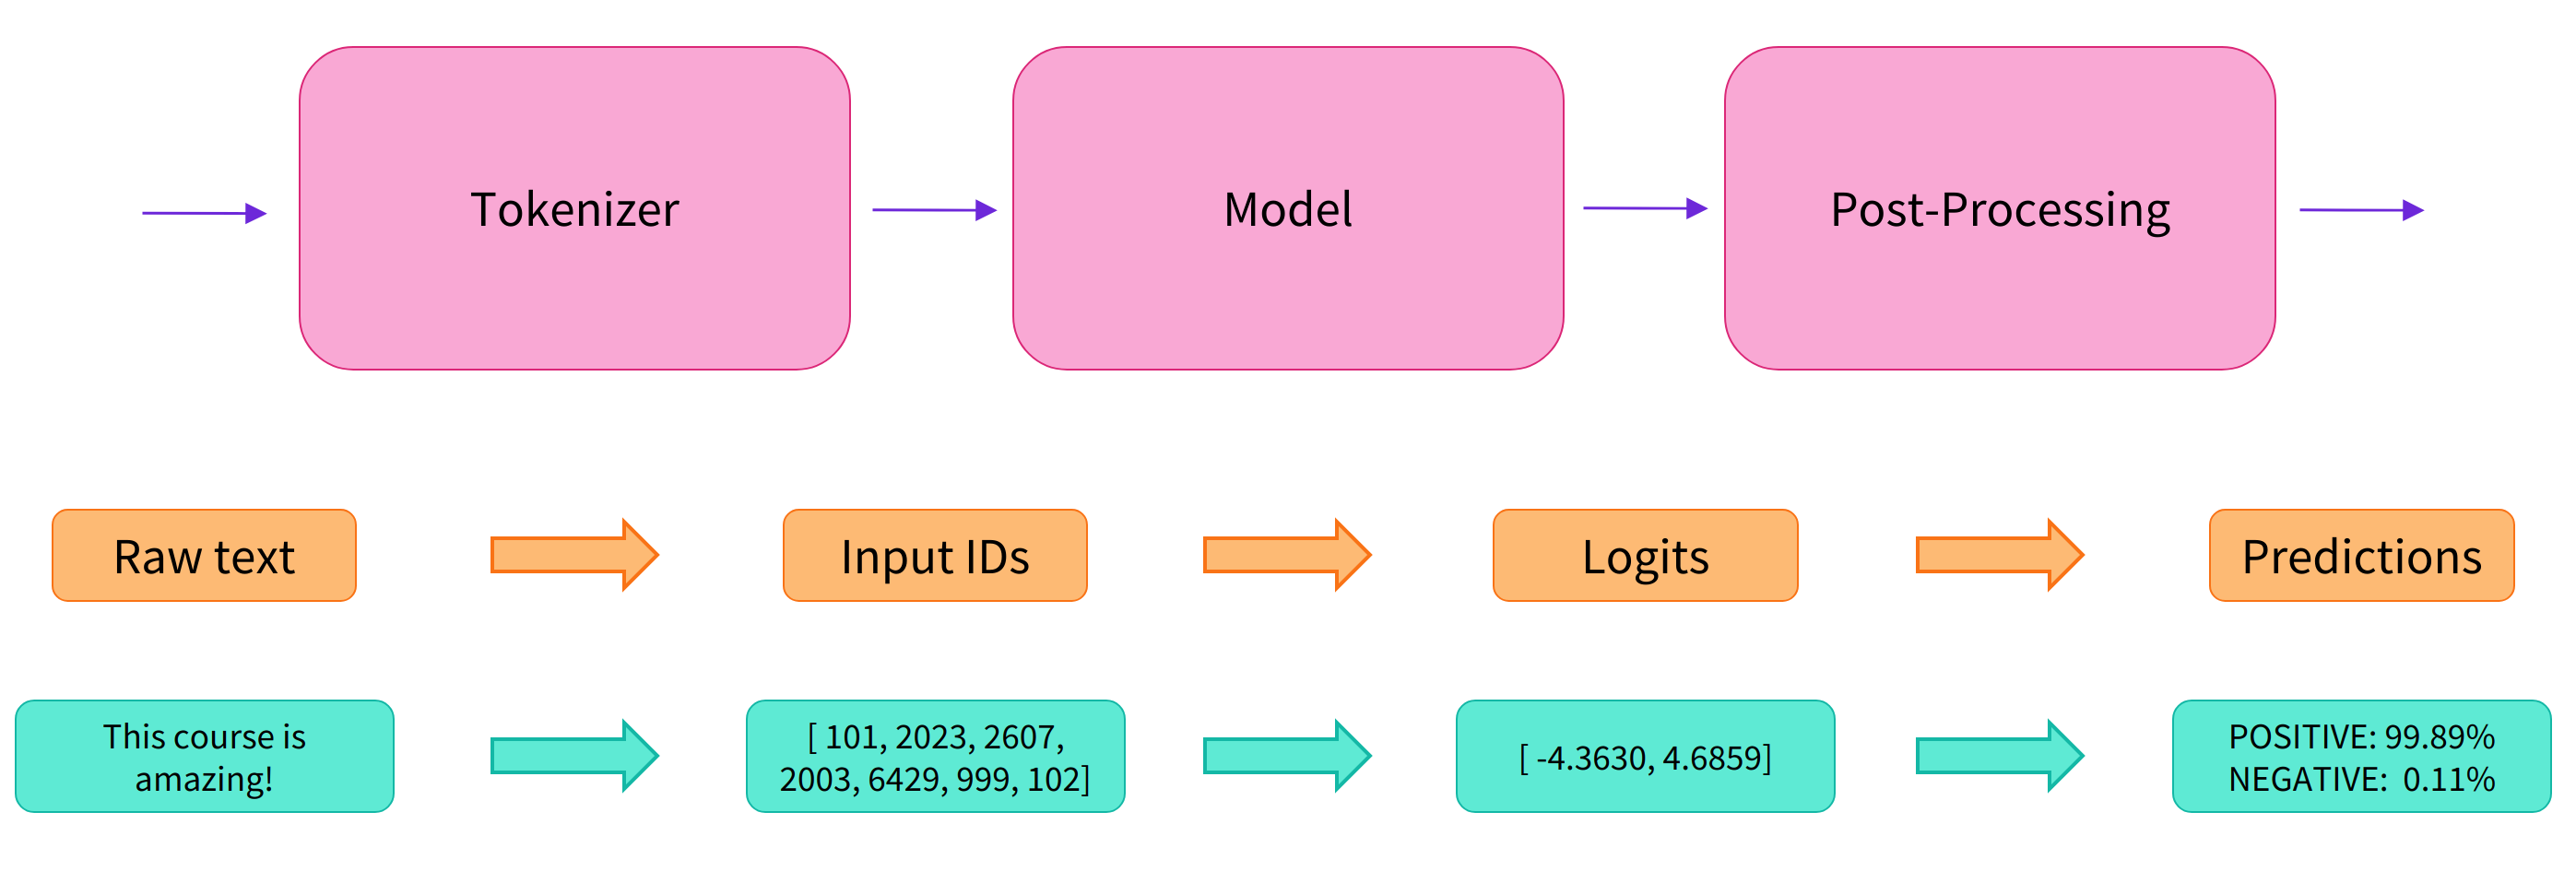


PreProcessing with Tokenizers

In [14]:
from transformers import AutoTokenizer
checkpoint = "distilbert-base-uncased-finetuned-sst-2-english"
tokenizer = AutoTokenizer.from_pretrained(checkpoint)

raw_input = [
                 "Beyond business, he was passionate about community service and was a great conversationalist. Pained by his demise. Condolences to his family and friends",
                 "RIP to all bank nifty gap down pandits"
                 ]

print("=================================\n     TOKENIZER \n=================================")
print(tokenizer)
print("=================================\n     RAW INPUT \n=================================")
print(raw_input)

     TOKENIZER 
PreTrainedTokenizerFast(name_or_path='distilbert-base-uncased-finetuned-sst-2-english', vocab_size=30522, model_max_len=512, is_fast=True, padding_side='right', truncation_side='right', special_tokens={'unk_token': '[UNK]', 'sep_token': '[SEP]', 'pad_token': '[PAD]', 'cls_token': '[CLS]', 'mask_token': '[MASK]'})
     RAW INPUT 
['Beyond business, he was passionate about community service and was a great conversationalist. Pained by his demise. Condolences to his family and friends', 'RIP to all bank nifty gap down pandits']


In [16]:
tf_inputs = tokenizer(raw_input, padding=True, truncation=True,  return_tensors="tf")
print("=================================\n     tf inputs \n=================================")
print(tf_inputs)

     tf inputs 
{'input_ids': <tf.Tensor: shape=(2, 32), dtype=int32, numpy=
array([[  101,  3458,  2449,  1010,  2002,  2001, 13459,  2055,  2451,
         2326,  1998,  2001,  1037,  2307,  4512, 13911,  2102,  1012,
        22295,  2011,  2010, 13614,  1012, 25805, 22717,  2015,  2000,
         2010,  2155,  1998,  2814,   102],
       [  101, 10973,  2000,  2035,  2924,  9152,  6199,  2100,  6578,
         2091, 29331,  2015,   102,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0]], dtype=int32)>, 'attention_mask': <tf.Tensor: shape=(2, 32), dtype=int32, numpy=
array([[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
       [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0]], dtype=int32)>}


## Going Through Model 

In [17]:
from transformers import TFAutoModel
checkpoint = "distilbert-base-uncased-finetuned-sst-2-english"
# Load the model

model = TFAutoModel.from_pretrained(checkpoint)
print("=================================\n     Model \n=================================")
print(model)


Downloading:   0%|          | 0.00/256M [00:00<?, ?B/s]

Some layers from the model checkpoint at distilbert-base-uncased-finetuned-sst-2-english were not used when initializing TFDistilBertModel: ['classifier', 'dropout_19', 'pre_classifier']
- This IS expected if you are initializing TFDistilBertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing TFDistilBertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
All the layers of TFDistilBertModel were initialized from the model checkpoint at distilbert-base-uncased-finetuned-sst-2-english.
If your task is similar to the task the model of the checkpoint was trained on, you can already use TFDistilBertModel for predictions without further training.


     Model 
